In [31]:
import numpy as np
import math
from icecream import ic
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

class GradientDescent(LinearRegression):
    def __init__(self):
        self.coef_ = np.array([0])
        self.intercept_ = 0
        self.learning_rate = 0.0001

    def fit(self, x: np.ndarray, y: np.ndarray):
        self.coef_ = 0 
        self.intercept_ = 0 
        n = len(x)
        learning_rate = self.learning_rate
        cost_prev = cost_curr = 0
        iter = 0

        while not math.isclose(cost_prev, cost_curr, rel_tol=(1 * 10**(-10))) or iter==0:
            cost_prev = cost_curr

            y_pred: np.ndarray = self.predict(x)
            #y_predicted: np.ndarray = 1 / (1 + math.e**-((self.coef_ * x).sum(axis=1) + self.intercept_ ))

            new_y: np.ndarray = y-y_pred

            #cost_curr = sum(new_y**2) / (2*n)
            cost_curr = sum(abs(y-y_pred)) / len(x)
            #ic(new_y)
            md = -(1/n) * (x.sum(axis=0)) * (new_y.sum())
            
            bd = -(1/n) * new_y.sum()

            #ic(md, bd)

            self.coef_ = self.coef_ - md*learning_rate
            self.intercept_ =  self.intercept_ - bd*learning_rate

            iter += 1
        #ic(cost_curr)
        ic(iter)

    def predict(self, x):
        return ((self.coef_ * x).sum(axis=1) + self.intercept_)


    def myscore(self, x, y : np.ndarray):
        y_pred: np.ndarray = self.predict(x)

        #ic(1 - sum(abs(y-y_pred)) / (len(x)))
        #1 - sum((y-y_pred)**2) / (2*len(x))

        return 1 - sum(abs(y-y_pred)) / len(x)
    
    def confusion_matrix(self, y_test: list, y_pred):
        y_test_sorted = sorted(set(y_test))

        result = [[0 for j in range(len(y_test_sorted))] for i in range(len(y_test_sorted))]

        def get_iter_el(el):
            for sorted_iter, sorted_el in enumerate(y_test_sorted):
                if sorted_el == el:
                    return sorted_iter

        for iter, el in enumerate(y_pred.copy()):
            result[get_iter_el(y_test[iter])][get_iter_el(el)] += 1
            

        return np.array(result)

    
iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2) # type: ignore

mymodel = GradientDescent()
mymodel.fit(x_train, y_train)
#ic(model.coef_, model.intercept_)
#print("mymodel.myscore()", mymodel.myscore(x_test, y_test))
print("mymodel.score()", mymodel.score(x_test, y_test))


model = LinearRegression()
model.fit(x_train, y_train)
#ic(mymodel.coef_, mymodel.intercept_)
#mymodel.coef_ = model.coef_
#mymodel.intercept_ = model.intercept_
#ic(mymodel.coef_, mymodel.intercept_)
#print("model.myscore()", mymodel.myscore(x_test, y_test))
ic(model.predict(x_test))
ic(model.coef_ * x_test + model.intercept_, x_test)
#print("model.score()", model.score(x_test, y_test))


ic| iter: 20


mymodel.score() 0.3723962776490626
model.score() 0.9248104220774903


Axes(0.125,0.11;0.62x0.77)


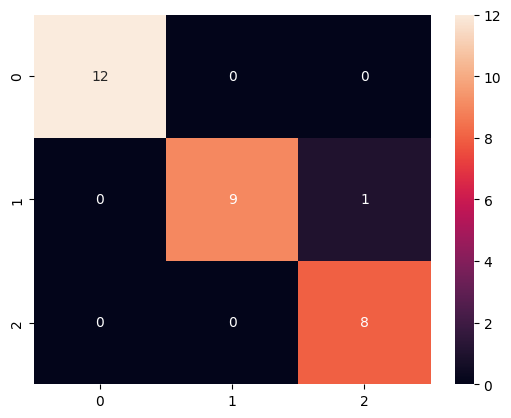

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
#ic(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred.round())
print(sb.heatmap(cm, annot=True))

#ic(y_test, y_pred)

Axes(0.125,0.11;0.62x0.77)


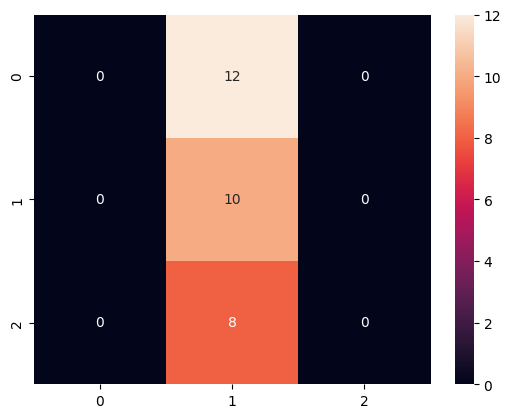

In [ ]:
my_y_pred = mymodel.predict(x_test)
#ic(y_test, my_y_pred)
mycm = mymodel.confusion_matrix(y_test, my_y_pred.round())
print(sb.heatmap(mycm, annot=True))

In [ ]:
import joblib

joblib.dump(model, "iris_disting_model")

In [ ]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

model: LinearRegression = joblib.load("iris_disting_model") 


iris = load_iris()

iris_name_coef = model.predict(np.array([[4.9, 3, 1.4, 0.2]]))[0]

ic(iris.target_names[round(iris_name_coef)], iris_name_coef)

ic| iris.target_names[round(iris_name_coef)]: 'setosa'
    iris_name_coef: 0


('setosa', 0)